In [49]:
import numpy as np
import pandas as pd
from collections import Counter
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from statistics import mean
import matplotlib.pyplot as plt
from sklearn import preprocessing 

In [50]:
df = pd.read_csv('winequality-red.csv', sep=';')
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [51]:
for i in range(len(df)):
    if df['quality'][i] > 5:
        df['quality'][i] = 'Good'
    else:
        df['quality'][i] = 'Bad'

C:\anaconda\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
C:\anaconda\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
C:\anaconda\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [52]:
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,Bad
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,Bad
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,Bad
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,Good
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,Bad
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,Bad
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,Good
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,Good
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,Bad


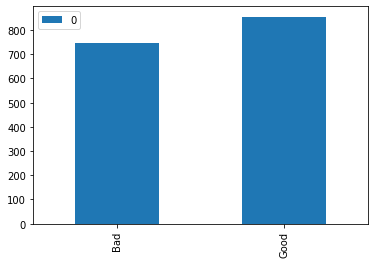

In [53]:
word_counts = Counter(df['quality'])
plot_frame = pd.DataFrame.from_dict(word_counts, orient='index')
plot_frame.plot(kind='bar')

In [54]:
feature_cols = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar','chlorides','free sulfur dioxide','total sulfur dioxide','density','pH','sulphates','alcohol']
X = df[feature_cols]
Y = df.quality

In [55]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

K value is: 1 and accuracy is : 0.734375
K value is: 2 and accuracy is : 0.61875
K value is: 3 and accuracy is : 0.6625
K value is: 4 and accuracy is : 0.646875
K value is: 5 and accuracy is : 0.65625
K value is: 6 and accuracy is : 0.640625
K value is: 7 and accuracy is : 0.615625
K value is: 8 and accuracy is : 0.625
K value is: 9 and accuracy is : 0.596875
K value is: 10 and accuracy is : 0.615625
K value is: 11 and accuracy is : 0.609375
K value is: 12 and accuracy is : 0.621875
K value is: 13 and accuracy is : 0.628125
K value is: 14 and accuracy is : 0.615625
K value is: 15 and accuracy is : 0.625
K value is: 16 and accuracy is : 0.65
K value is: 17 and accuracy is : 0.63125
K value is: 18 and accuracy is : 0.6375
K value is: 19 and accuracy is : 0.634375
K value is: 20 and accuracy is : 0.634375
K value is: 21 and accuracy is : 0.628125
K value is: 22 and accuracy is : 0.65
K value is: 23 and accuracy is : 0.65
K value is: 24 and accuracy is : 0.653125
K value is: 25 and accurac

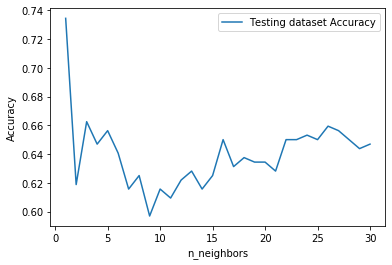

In [56]:
neighbors = np.arange(1, 31) 
train_accuracy = np.empty(len(neighbors)) 
test_accuracy = np.empty(len(neighbors))

# Loop over K values 
for i, k in enumerate(neighbors): 
    knn = KNeighborsClassifier(n_neighbors=k) 
    knn.fit(X_train, y_train) 
      
    # Compute traning and test data accuracy 
    y_pred = knn.predict(X_test)
    test_accuracy[i] = metrics.accuracy_score(y_test, y_pred)
    print("K value is: {} and accuracy is : {}".format(k,test_accuracy[i]))
  

test_avg = mean(test_accuracy)
test_max = max(test_accuracy)
max_index = np.where(test_accuracy == test_max)
print("test accuracy average is : {}".format(test_avg))
print("best accuracy is : {} and its on K value of: {}".format(test_max, max_index[0][0] +1))

# Generate plot 
plt.plot(neighbors, test_accuracy, label = 'Testing dataset Accuracy')  
  
plt.legend() 
plt.xlabel('n_neighbors') 
plt.ylabel('Accuracy') 
plt.show()

K value is: 1 and accuracy is : 0.7625
K value is: 2 and accuracy is : 0.71875
K value is: 3 and accuracy is : 0.70625
K value is: 4 and accuracy is : 0.715625
K value is: 5 and accuracy is : 0.7125
K value is: 6 and accuracy is : 0.71875
K value is: 7 and accuracy is : 0.71875
K value is: 8 and accuracy is : 0.703125
K value is: 9 and accuracy is : 0.7125
K value is: 10 and accuracy is : 0.7125
K value is: 11 and accuracy is : 0.725
K value is: 12 and accuracy is : 0.721875
K value is: 13 and accuracy is : 0.728125
K value is: 14 and accuracy is : 0.721875
K value is: 15 and accuracy is : 0.7375
K value is: 16 and accuracy is : 0.740625
K value is: 17 and accuracy is : 0.73125
K value is: 18 and accuracy is : 0.746875
K value is: 19 and accuracy is : 0.7375
K value is: 20 and accuracy is : 0.740625
K value is: 21 and accuracy is : 0.746875
K value is: 22 and accuracy is : 0.734375
K value is: 23 and accuracy is : 0.734375
K value is: 24 and accuracy is : 0.73125
K value is: 25 and acc

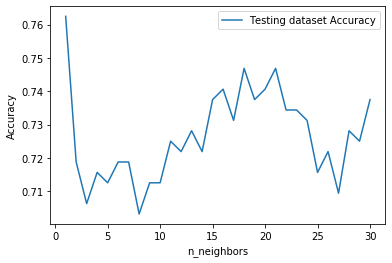

In [57]:
min_max_scaler = preprocessing.MinMaxScaler(feature_range =(0, 1)) 
  
# Scaled feature 
x_after_min_max_scaler = min_max_scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(x_after_min_max_scaler, Y, test_size=0.2)
neighbors = np.arange(1, 31) 
train_accuracy = np.empty(len(neighbors)) 
test_accuracy = np.empty(len(neighbors))

# Loop over K values 
for i, k in enumerate(neighbors): 
    knn = KNeighborsClassifier(n_neighbors=k) 
    knn.fit(X_train, y_train) 
      
    # Compute traning and test data accuracy 
    y_pred = knn.predict(X_test)
    test_accuracy[i] = metrics.accuracy_score(y_test, y_pred)
    print("K value is: {} and accuracy is : {}".format(k,test_accuracy[i]))
  

test_avg = mean(test_accuracy)
test_max = max(test_accuracy)
max_index = np.where(test_accuracy == test_max)
print("test accuracy average is : {}".format(test_avg))
print("best accuracy is : {} and its on K value of: {}".format(test_max, max_index[0][0] +1))

# Generate plot 
plt.plot(neighbors, test_accuracy, label = 'Testing dataset Accuracy')  
  
plt.legend() 
plt.xlabel('n_neighbors') 
plt.ylabel('Accuracy') 
plt.show()